In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
pi = np.pi


In [2]:
def delta_dm(A, fm, fs, pi):
    return 2 * A * fm * pi / fs

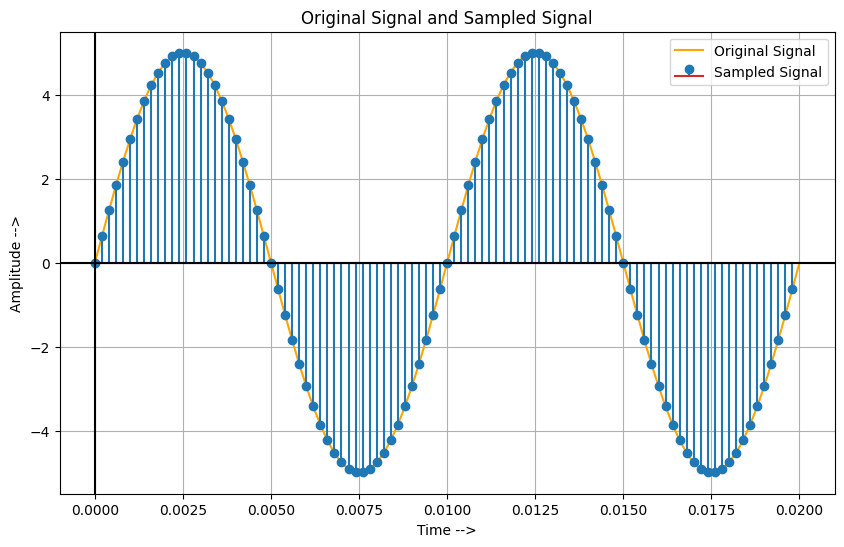

In [3]:
A = 5 #Input signal Amplitude
fm = 100 # Message Frequency
M = 50
fs = M * fm # Sampling frequency
ts = 1 / fs #Sampling Period
cycles = 2 #Number of cycles
t_org = np.linspace(0, M * cycles * ts, 10000)
t_sam = np.arange(0, M * cycles * ts, ts)
x_org = A * np.sin(2 * pi * fm * t_org)
x_sam = A * np.sin(2 * pi * fm * t_sam)

plt.figure(figsize=(10,6))
plt.plot(t_org, x_org, color = 'orange')
plt.stem(t_sam, x_sam)
plt.title('Original Signal and Sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.legend(['Original Signal', 'Sampled Signal'], loc = 'upper right')
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.show()

In [4]:
delta = delta_dm(A, fm, fs, pi)
print(delta)

0.6283185307179586


In [5]:
e=np.zeros(len(t_sam))
eq=np.zeros(len(t_sam))
mq=[]

In [8]:
# logic 1
for i in range(0,len(t_sam)):
    if i == 0:
        pass
    
    err = x_sam[i] - x_sam[i -1]
    if err == 0:
        for j in range(1 * M):
            mq.append(delta)
    if err > 0:
        delta+= delta
        for j in range(1 * M):
            mq.append(delta)
    else:
        delta-= delta
        for j in range(1 * M):
            mq.append(delta)
Mq = np.array(mq)
print(len(Mq))

15300


In [9]:
# GPT code

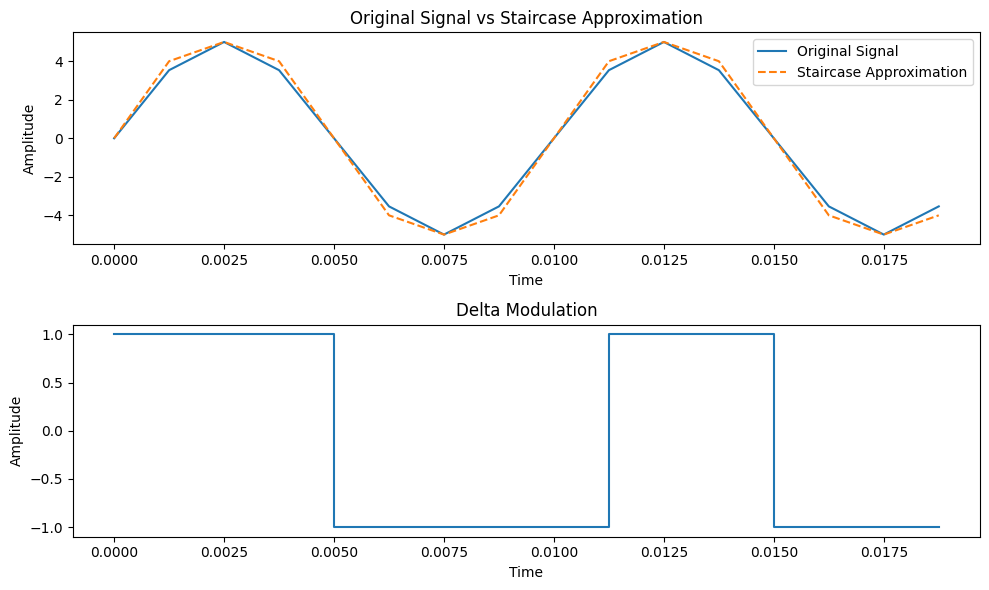

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 5
frequency = 100  # Hz
num_cycles = 2
sampling_frequency = 4 * frequency * num_cycles
time = np.arange(0, num_cycles * 1 / frequency, 1 / sampling_frequency)

# Original sinusoidal signal
original_signal = amplitude * np.sin(2 * np.pi * frequency * time)

# Staircase approximation
step_size = 1
staircase_signal = np.round(original_signal / step_size) * step_size

# Delta Modulation
delta = 1
delta_modulated_signal = np.zeros(len(time))
previous_approximation = 0
for i in range(len(time)):
    error = original_signal[i] - previous_approximation
    if error >= 0:
        delta_modulated_signal[i] = delta
    else:
        delta_modulated_signal[i] = -delta
    previous_approximation += delta_modulated_signal[i]

# Plotting
plt.figure(figsize=(10, 6))

# Original signal vs Staircase approximation
plt.subplot(2, 1, 1)
plt.plot(time, original_signal, label='Original Signal')
plt.plot(time, staircase_signal, label='Staircase Approximation', linestyle='--')
plt.title('Original Signal vs Staircase Approximation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Delta Modulation
plt.subplot(2, 1, 2)
plt.step(time, delta_modulated_signal, where='post')
plt.title('Delta Modulation')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
